In [76]:
# PROYECTO 1
# ANALIZADOR DE BIO-VIABILIDAD FARMACOLÓGICA
# Basado en la Regla de Lipinski
#
# Autor: Christian Abraham Barrios Reyes
# Fecha:19/01/2026


In [77]:
# INTRODUCCIÓN
#
# En el desarrollo de nuevos fármacos existen millones de moléculas posibles.
# Sin embargo, solo una pequeña fracción presenta características adecuadas
# para ser administradas como medicamentos.
#
# Por esta razón, se utilizan filtros computacionales que permiten descartar
# moléculas no viables antes de realizar pruebas experimentales.
#
# En este proyecto se implementa un analizador de bio-viabilidad utilizando
# la Regla de Lipinski y herramientas de química computacional.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw


In [79]:
# Un SMILES (Simplified Molecular Input Line Entry System)
# es una representación textual de una molécula.
#
# Permite describir estructuras químicas complejas mediante texto,
# lo que facilita su análisis computacional.


In [80]:
def analizar_molecula(smiles):
    mol = Chem.MolFromSmiles(smiles)
    
    if mol is None:
        return None

    peso = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)

    violaciones = 0
    razones = []

    if peso >= 500:
        violaciones += 1
        razones.append("Peso molecular alto")

    if logp >= 5:
        violaciones += 1
        razones.append("LogP elevado")

    if hbd > 5:
        violaciones += 1
        razones.append("Exceso de donadores de H")

    if hba > 10:
        violaciones += 1
        razones.append("Exceso de aceptores de H")

    return {
        "SMILES": smiles,
        "Peso_Molecular": round(peso, 2),
        "LogP": round(logp, 2),
        "H_Donors": hbd,
        "H_Acceptors": hba,
        "Violaciones": violaciones,
        "Razones": ", ".join(razones) if razones else "Cumple la regla",
        "Viable": violaciones <= 1
    }


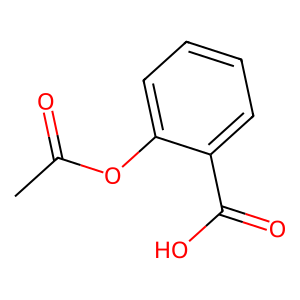

In [81]:
mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
Draw.MolToImage(mol)


In [82]:
moleculas_ejemplo = [
    "CC(=O)OC1=CC=CC=C1C(=O)O",      # Aspirina
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",  # Cafeína
    "CCCCCCCCCCCCCCCCCCCCCCC(=O)O", # No viable
    "C1=CC=C(C=C1)C2=CC=CC=C2"      # Bifenilo
]


In [83]:
resultados = []

for s in moleculas_ejemplo:
    r = analizar_molecula(s)
    if r:
        resultados.append(r)

df_ejemplo = pd.DataFrame(resultados)
df_ejemplo


,SMILES,Peso_Molecular,LogP,H_Donors,H_Acceptors,Violaciones,Razones,Viable
0,CC(=O)OC1=CC=CC=C1C(=O)O,180.16,1.31,1,3,0,Cumple la regla,True
1,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,194.19,-1.03,0,6,0,Cumple la regla,True
2,CCCCCCCCCCCCCCCCCCCCCCC(=O)O,354.62,8.28,1,1,1,LogP elevado,True
3,C1=CC=C(C=C1)C2=CC=CC=C2,154.21,3.35,0,0,0,Cumple la regla,True


In [84]:
# En este análisis preliminar se observa que no todas las moléculas
# cumplen los criterios de bio-viabilidad, lo que demuestra la
# importancia del filtrado computacional.


In [85]:
df_chembl = pd.read_csv("Lipophilicity.csv")
df_chembl.head()


,CMPD_CHEMBLID,exp,smiles
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...


In [86]:
df_chembl = df_chembl.sample(200, random_state=1)


In [87]:
resultados_chembl = []

for smiles in df_chembl["smiles"]:
    res = analizar_molecula(smiles)
    if res:
        resultados_chembl.append(res)

df_resultados = pd.DataFrame(resultados_chembl)
df_resultados.head()



,SMILES,Peso_Molecular,LogP,H_Donors,H_Acceptors,Violaciones,Razones,Viable
0,OC(=O)CCc1ccc(NCc2cccc(Oc3ccccc3)c2)cc1,347.41,5.11,2,3,1,LogP elevado,True
1,C[C@@H]1CN(Cc2ccc(F)cc2)[C@@H](C)CN1C(=O)c3cc4...,513.01,3.98,0,5,1,Peso molecular alto,True
2,Cc1ccccc1C[C@H](N2CCC(CN3CCC(CC3)Oc4ccc(Cl)c(C...,505.49,5.55,1,4,2,"Peso molecular alto, LogP elevado",False
3,Nc1cccc2C(=O)N(Cc3cccc(Cl)c3)C(=O)c12,286.72,2.72,1,3,0,Cumple la regla,True
4,CCN(CC)CCNC(=O)c1ccc(N)cc1,235.33,1.34,2,3,0,Cumple la regla,True


In [88]:
df_resultados["Viable"].value_counts()


Viable
True     194
False      6
Name: count, dtype: int64

In [89]:
def clasificar_viabilidad(v):
    if v == 0:
        return "Alta"
    elif v == 1:
        return "Media"
    else:
        return "Baja"


In [90]:
df_resultados["Nivel_Viabilidad"] = df_resultados["Violaciones"].apply(clasificar_viabilidad)


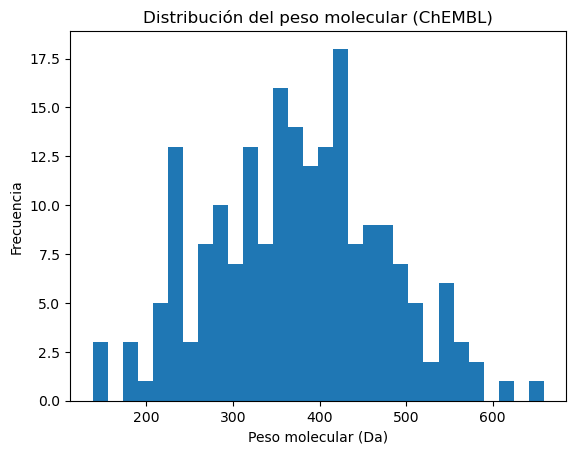

In [91]:
plt.hist(df_resultados["Peso_Molecular"], bins=30)
plt.title("Distribución del peso molecular (ChEMBL)")
plt.xlabel("Peso molecular (Da)")
plt.ylabel("Frecuencia")
plt.show()


In [92]:
# CONCLUSIÓN
#
# El uso de la Regla de Lipinski permitió identificar moléculas con mayor
# probabilidad de biodisponibilidad oral. El análisis con datos reales de
# ChEMBL demuestra la utilidad de los filtros computacionales en etapas
# tempranas del diseño de fármacos.


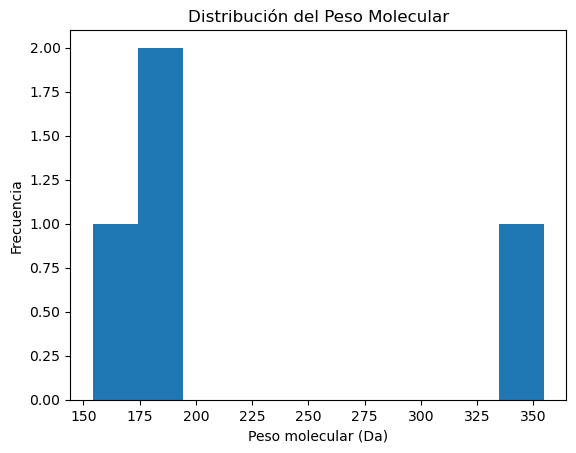

In [93]:
plt.hist(df["Peso_Molecular"])
plt.title("Distribución del Peso Molecular")
plt.xlabel("Peso molecular (Da)")
plt.ylabel("Frecuencia")
plt.show()


In [94]:
total = len(df_resultados)
viables = df_resultados["Viable"].sum()

porcentaje = (viables / total) * 100

print(f"Moléculas analizadas: {total}")
print(f"Moléculas viables: {viables}")
print(f"Porcentaje viable: {porcentaje:.2f}%")


Moléculas analizadas: 200
Moléculas viables: 194
Porcentaje viable: 97.00%


In [95]:
df_chembl.columns


Index(['CMPD_CHEMBLID', 'exp', 'smiles'], dtype='object')